In [8]:
# Data file 
# Data file read

# Data Read
* CSV -> comma separated values
* EXCEL

In [3]:
# df = pd.read_csv("cpdata - cpdata.csv")

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('cpdata - cpdata.csv')

In [9]:
df

temperature   humidity        ph    rainfall       label  season  \
0       20.879744  82.002744  6.502985  202.935536        rice  Kharif   
1       21.770462  80.319644  7.038096  226.655537        rice  Kharif   
2       23.004459  82.320763  7.840207  263.964248        rice  Kharif   
3       26.491096  80.158363  6.980401  242.864034        rice  Kharif   
4       20.130175  81.604873  7.628473  262.717340        rice  Kharif   
...           ...        ...       ...         ...         ...     ...   
3095    25.287846  89.636679  6.765095   58.286977  watermelon    Zaid   
3096    26.638386  84.695469  6.189214   48.324286  watermelon    Zaid   
3097    25.331045  84.305338  6.904242   41.532187  watermelon    Zaid   
3098    26.897502  83.892415  6.463271   43.971937  watermelon    Zaid   
3099    26.986037  89.413849  6.260839   58.548767  watermelon    Zaid   

      soil type  
0     alluvial   
1     alluvial   
2     alluvial   
3     alluvial   
4     alluvial   
...         ...  
3095      sandy  
3096      sandy  
3097      sandy  
3098      sandy  
3099      sandy  

[3100 rows x 7 columns]

In [13]:
df['season'].value_counts()

Kharif    1500
Rabi       900
Zaid       600
Karib      100
Name: season, dtype: int64

In [45]:
from auto_preprocess.data_preprocess import DataPreprocessor

In [46]:
preprocessor = DataPreprocessor(df)

In [47]:
preprocessor.remove_outliers()

In [33]:
preprocessor.drop()
preprocessor.impute(method='mean')
preprocessor.scale(scaler_type = 'standard')
preprocessor.label_encode()

In [48]:
preprocessed_df = preprocessor.df
preprocessed_df

Name  Class  Roll NO   Pass
0  Aryan      1      172   True
1  Kiran      2      142  False
2  Nidhi      3      122   True

In [23]:
preprocessor.impute(method='mean')

In [6]:
preprocessor.label_encode()

In [12]:
preprocessor.drop()

In [24]:
preprocessed_df = preprocessor.df

In [25]:
preprocessed_df

Name  Class  Roll NO   Pass
0   Aryan   34.5   172.00   True
1   Kiran    2.0   142.00  False
2   Nidhi   34.5   122.00   True
3  Ramesh   67.0   109.25  False
4  Suresh   34.5     1.00  False

In [157]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns[df.select_dtypes(include=['float64', 'int64']).isna().any()].tolist()

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [244]:
df.head()

Class  Roll NO
0   34.5   172.00
1    2.0   142.00
2   34.5   122.00
3   67.0   109.25
4   34.5     1.00

# Pandas get dummy

In [4]:
ohe = pd.get_dummies(df, columns = ['soil type'])

In [5]:
ohe

temperature   humidity        ph    rainfall       label  season  \
0       20.879744  82.002744  6.502985  202.935536        rice  Kharif   
1       21.770462  80.319644  7.038096  226.655537        rice  Kharif   
2       23.004459  82.320763  7.840207  263.964248        rice  Kharif   
3       26.491096  80.158363  6.980401  242.864034        rice  Kharif   
4       20.130175  81.604873  7.628473  262.717340        rice  Kharif   
...           ...        ...       ...         ...         ...     ...   
3095    25.287846  89.636679  6.765095   58.286977  watermelon    Zaid   
3096    26.638386  84.695469  6.189214   48.324286  watermelon    Zaid   
3097    25.331045  84.305338  6.904242   41.532187  watermelon    Zaid   
3098    26.897502  83.892415  6.463271   43.971937  watermelon    Zaid   
3099    26.986037  89.413849  6.260839   58.548767  watermelon    Zaid   

      soil type_alluvial  soil type_alluvial   soil type_black  \
0                      0                    1                0   
1                      0                    1                0   
2                      0                    1                0   
3                      0                    1                0   
4                      0                    1                0   
...                  ...                  ...              ...   
3095                   0                    0                0   
3096                   0                    0                0   
3097                   0                    0                0   
3098                   0                    0                0   
3099                   0                    0                0   

      soil type_loam  soil type_loam soil  soil type_loamy  \
0                  0                    0                0   
1                  0                    0                0   
2                  0                    0                0   
3                  0                    0                0   
4                  0                    0                0   
...              ...                  ...              ...   
3095               0                    0                0   
3096               0                    0                0   
3097               0                    0                0   
3098               0                    0                0   
3099               0                    0                0   

      soil type_mountain  soil type_sandy  soil type_sandy   \
0                      0                0                 0   
1                      0                0                 0   
2                      0                0                 0   
3                      0                0                 0   
4                      0                0                 0   
...                  ...              ...               ...   
3095                   0                1                 0   
3096                   0                1                 0   
3097                   0                1                 0   
3098                   0                1                 0   
3099                   0                1                 0   

      soil type_sandy loam  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
3095                     0  
3096                     0  
3097                     0  
3098                     0  
3099                     0  

[3100 rows x 16 columns]

In [22]:
group = df.groupby(['season','soil type']).mean()

C:\Users\WARRIOR\AppData\Local\Temp\ipykernel_15388\922554626.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df.groupby(['season','soil type']).mean()


# Sklearn OHE



In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
X = df.iloc[:, 4].values

In [7]:
X

array(['rice', 'rice', 'rice', ..., 'watermelon', 'watermelon',
       'watermelon'], dtype=object)

In [8]:
le = LabelEncoder()
X = le.fit_transform(X)

In [9]:
X

array([28, 28, 28, ..., 29, 29, 29])

In [12]:
X = X.reshape(-1, 1)

In [13]:
ohe = OneHotEncoder()
X = ohe.fit_transform(X).toarray()


In [14]:
X

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# Scaling

In [12]:
df.iloc[:,3].values

array([202.9355362 , 226.6555374 , 263.9642476 , ...,  41.53218699,
        43.97193745,  58.54876687])

In [13]:
from sklearn.preprocessing import StandardScaler
st_sc = StandardScaler()
scaled_rainfall = st_sc.fit_transform(df.iloc[:,3].values.reshape(-1, 1))


In [14]:
scaled_rainfall

array([[ 1.44792422],
       [ 1.81832798],
       [ 2.40092855],
       ...,
       [-1.07249752],
       [-1.03439918],
       [-0.80677219]])

In [3]:
df.head(13) # Default Value -> 5

temperature   humidity        ph    rainfall label  season  soil type
0     20.879744  82.002744  6.502985  202.935536  rice  Kharif  alluvial 
1     21.770462  80.319644  7.038096  226.655537  rice  Kharif  alluvial 
2     23.004459  82.320763  7.840207  263.964248  rice  Kharif  alluvial 
3     26.491096  80.158363  6.980401  242.864034  rice  Kharif  alluvial 
4     20.130175  81.604873  7.628473  262.717340  rice  Kharif  alluvial 
5     23.058049  83.370118  7.073454  251.055000  rice  Kharif  alluvial 
6     22.708838  82.639414  5.700806  271.324860  rice  Kharif  alluvial 
7     20.277744  82.894086  5.718627  241.974195  rice  Kharif  alluvial 
8     24.515881  83.535216  6.685346  230.446236  rice  Kharif  alluvial 
9     23.223974  83.033227  6.336254  221.209196  rice  Kharif  alluvial 
10    26.527235  81.417538  5.386168  264.614870  rice  Kharif  alluvial 
11    23.978982  81.450616  7.502834  250.083234  rice  Kharif  alluvial 
12    26.800796  80.886848  5.108682  284.436457  rice  Kharif  alluvial

### Horizontal -> Rows
### Vertical -> Columns

In [4]:
df.shape

(3100, 7)

## Info
* Column Name
* Non Null [Null = Empty Values]
* Data Type

* Number of Rows
* Total Columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   label        3100 non-null   object 
 5   season       3100 non-null   object 
 6   soil type    3100 non-null   object 
dtypes: float64(4), object(3)
memory usage: 169.7+ KB


## Describe -> Statistical Description

* Mean
* Median
* Mode

* Max
* Min

In [6]:
df.describe()

temperature     humidity           ph     rainfall
count  3100.000000  3100.000000  3100.000000  3100.000000
mean     27.108466    66.005312     6.368913   110.213031
std       7.566308    24.007713     0.809477    64.048562
min       8.825675    10.034048     3.504752    20.211267
25%      22.810495    55.244920     5.895343    64.909095
50%      26.102848    68.980529     6.342518    97.057093
75%      29.365644    84.446524     6.841616   141.210784
max      54.986760    99.981876     9.935091   397.315380

In [7]:
df['temperature'] # df.temperature

0       20.879744
1       21.770462
2       23.004459
3       26.491096
4       20.130175
          ...    
3095    25.287846
3096    26.638386
3097    25.331045
3098    26.897502
3099    26.986037
Name: temperature, Length: 3100, dtype: float64

# Distribution

<AxesSubplot: ylabel='Density'>

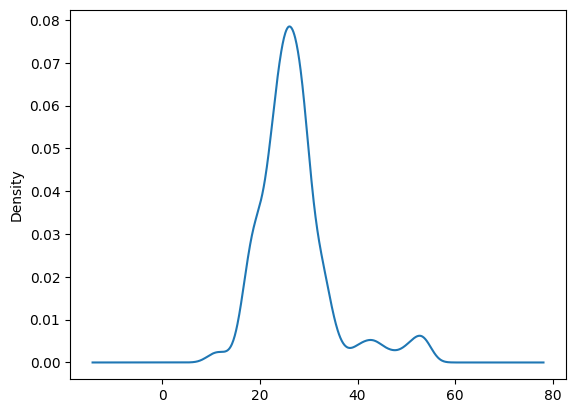

In [9]:
df.temperature.plot.density()

<AxesSubplot: ylabel='Density'>

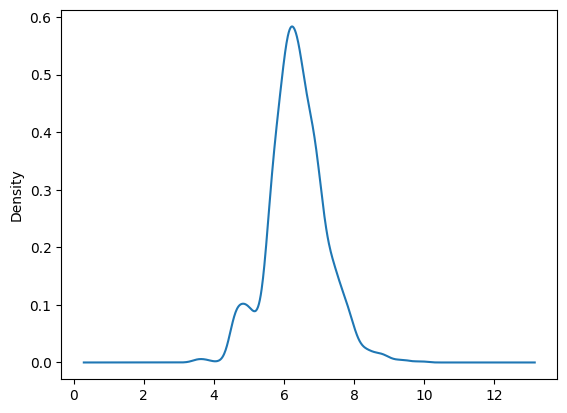

In [10]:
df['ph'].plot.density()

### Method 2 [Imp]

In [8]:
import seaborn as sns

C:\Users\WARRIOR\AppData\Local\Temp\ipykernel_12508\2283142937.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


<AxesSubplot: xlabel='humidity', ylabel='Density'>

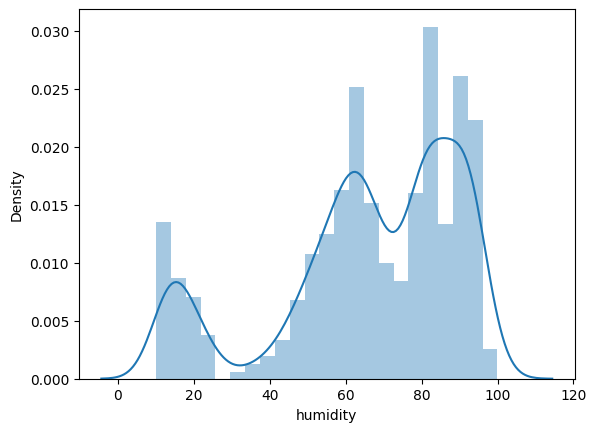

In [9]:
col = df['humidity']
sns.distplot(col)

C:\Users\WARRIOR\AppData\Local\Temp\ipykernel_12508\1475453639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ph'])


<AxesSubplot: xlabel='ph', ylabel='Density'>

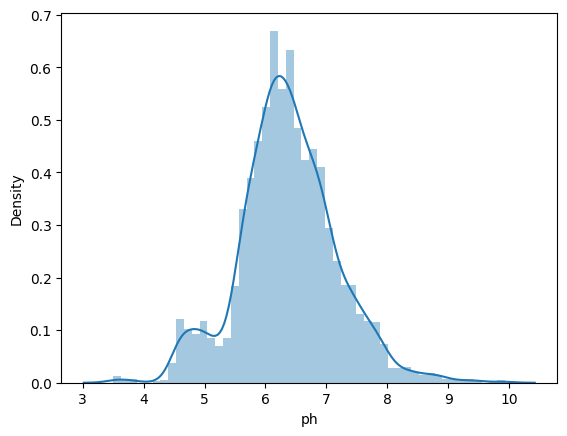

In [10]:
sns.distplot(df['ph'])

In [11]:
df_sel = df.iloc[0:5+1,0:5+1]

In [12]:
df_sel

temperature   humidity        ph    rainfall label  season
0    20.879744  82.002744  6.502985  202.935536  rice  Kharif
1    21.770462  80.319644  7.038096  226.655537  rice  Kharif
2    23.004459  82.320763  7.840207  263.964248  rice  Kharif
3    26.491096  80.158363  6.980401  242.864034  rice  Kharif
4    20.130175  81.604873  7.628473  262.717340  rice  Kharif
5    23.058049  83.370118  7.073454  251.055000  rice  Kharif

In [22]:
df.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
season         0
soil type      0
dtype: int64

In [53]:
df['temp degree'] = df['temperature']+1

######################

df['zero'] = 0

In [52]:
df.drop(columns=['zero','temp degree'],inplace=True)

In [49]:
df['humidity']

68.980529315

In [34]:
df_excel = pd.read_excel('Train Dataset columns.xlsx') 


In [35]:
df_excel.tail() # Default last 5 values

Old File Name
1469             Death
1470  SpokenCategories
1471            Assent
1472      Nonfluencies
1473           Fillers

In [36]:
df_excel.shape

(1474, 1)

In [37]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Old File Name  1472 non-null   object
dtypes: object(1)
memory usage: 11.6+ KB


In [44]:
df_excel.isnull().sum()

Old File Name    0
dtype: int64

In [43]:
df_excel.fillna(10,inplace=True)

In [50]:
df_excel['Old File Name'].mode()

0    10
Name: Old File Name, dtype: object